In [10]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 6)
players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


1) Data Descriptions:  
   There are 2 data provided for these project:    
   . The first data is 'players.csv' which consists of information about players with 7 observations. First with experience in game, whether they are subscribed to the game newsletter, their hashed email address for security, number of hours they played, gender and age.  
   . Second data is 'sessions.csv' which containes information about each session with 5 observation. First, each email that was used associated with the session which is hashed for security reasons, the start date and time of the session in character format, the end date and time of the session in character format, original start time in numeric format and lastly, original end time in numeric format.
     
   . Below are the summary statiistics for players and sessions respectively (all numeric values rounded to either 2 decimal, or 2 siginificant figures):   
   . For the players data there are 4 character observations, 1 logical overservation containing only TRUE or FALSE, 2 numerical values for hours played and age, both which are rounded to 2 decimal places. The highest hours played observed in this data is roughly 223 hours and the least amount of played hours in this data is rounded to 0. The oldest person in this data is 58 years old and the youngest person in this data is 9 years old.    
   . For the sessions data, 3 columns type is in character, and the rest are numeric stadnard form (which are rounded to 2 significant figures). Both columns share the same rounded max and min values.

In [11]:
players |>
mutate(across(where(is.numeric), ~ round(., 2))) |>
summary()

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [12]:
sessions |>
mutate(across(c(original_start_time, original_end_time), ~ signif(., digits = 2))) |>
summary()

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.7e+12    
 Class :character   Class :character   Class :character   1st Qu.:1.7e+12    
 Mode  :character   Mode  :character   Mode  :character   Median :1.7e+12    
                                                          Mean   :1.7e+12    
                                                          3rd Qu.:1.7e+12    
                                                          Max.   :1.7e+12    
                                                                             
 original_end_time
 Min.   :1.7e+12  
 1st Qu.:1.7e+12  
 Median :1.7e+12  
 Mean   :1.7e+12  
 3rd Qu.:1.7e+12  
 Max.   :1.7e+12  
 NA's   :2        

2. Questions  
   . The broad question for this project is question 1 being 'What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?'  
   . My specific question for this project would be: 'Which pair of predictors being Experince and Played Hours, Experience and Age, lastly Played Hours and Age have the highest level of accuracy of predicting whther or not a player is subscribed to in-game newsletter or not.'  
   . Since the distribution between Age and Played hours differ, it is important to ensure all numeric column predictors are standardized prior to applying the prediction algorithm.

3. Exploratory Data Analysis and Vizualizartion
   . At the top of this page, we have loaded our relevant libraries alongside reading the data and saving them into an appropriate variable. A summary of both data have been run after the 'Data Description' section to check for the initial data statistics.  
   . Since our questions only requires the observations in Experience, Subscribe, played_hours and age, we can make a dataframe only containing these columns.  
   . Next, a table containing the mean values for numerical values in players dataframe, extraced from summary statistics in section 1 (rounded to 2 decimals).
   . Last but not least, a table showing the relationship between the selected observations. One observation from this plot shows that all numerical values must be standardized before any prediction algorithm is applied.

experience,subscribe,played_hours,Age
<chr>,<lgl>,<dbl>,<dbl>
Pro,TRUE,30.3,9
Veteran,TRUE,3.8,17
Veteran,FALSE,0.0,17
⋮,⋮,⋮,⋮
Amateur,FALSE,0.0,57
Amateur,FALSE,2.3,17
Pro,TRUE,0.2,NA


mean_played_hours,mean_age
<dbl>,<dbl>
5.85,21.14


Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”


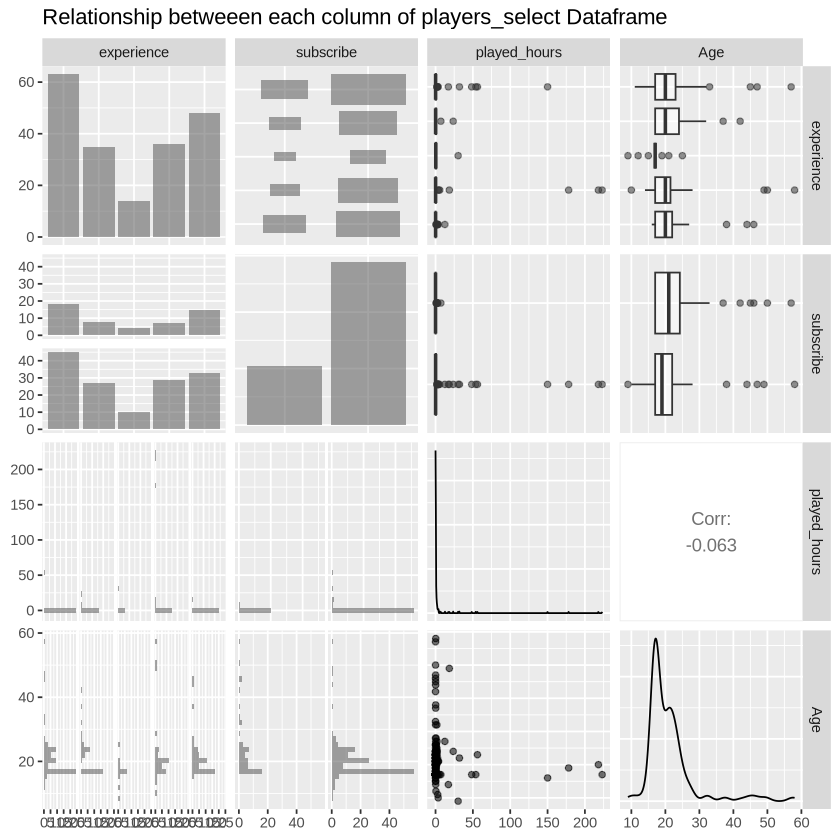

In [15]:
players_select <- select(players, experience, subscribe, played_hours, Age)
players_select
mean_report <- tibble(mean_played_hours = 5.85, mean_age = 21.14)
mean_report
plot_relationship <- players_select |>
                        ggpairs(mapping = aes(alpha = 0.4)) +
                        theme(text = element_text(size = 11)) +
                        labs(title = "Relationship betweeen each column of players_select Dataframe")
plot_relationship

4. Methods and Plan:  
   . The best method for this to use k-nn Alogrithm between all predictors, since one predictor and the response variable are non-numerical observations. First splitting the data into training data and testing data. Then performing a cross-validation check with n=3,5,7,9 to determine which number of neighbors has highest accuracy, finally using that value to compute the testing data.  
   . We have to assume all the randomization between the predictors remain the same to ensure fairness.  
   . A potential limitation is that overall, k-nn algorithm is not the best algorithm since on of our predictors is non-numerical.  
   . We select our tables by creating 3 individual tables with the following columns: 1. experience, subscribe, hours_played 2. experience, subscribe, Age 3. subscribe, hours_played, Age.  
   Apply k-nn with a 60/40 split to each table with cross validation to find the best number of neighbours between each table and finaly computing the accuracy of prediction between all 3 tables and determine which 2 predictors are the best for predicting whether poeple subscribe or not. 